Shuxiang Sui

ss6711@columbia.edu

Lab #3
Questions:






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

**1. Create a multivariate time series; perform any interpolations.**

Dependent variable: mmtlhlth (the days with bad mental health).

Independent variables:

1) year 2) age 3) happy((%people who think they are happy) 4) health(how healthy they think they are)

In [ ]:
gss = pd.read_csv('/content/trends-gss.csv')
variables = ["year", "mntlhlth", "sex", "age", "life", "wrkstat", "happy", "health"]
sub = gss[variables].copy()

In [ ]:
# Recode variables and creating indicator variables
sub['badmhealth'] = np.where(sub['mntlhlth'] > 1, 1, 0)
sub['excit'] = np.where(sub['life'] == 1, 1, 0) #life exciting level
sub['happiness'] = np.where(sub['happy'] == 1, 1, 0)
sub['goodhealth'] = np.where(sub['health'] <= 2, 1, 0)

In [ ]:
# Get means by year
by_year = sub.groupby('year', as_index = False).agg('mean').replace({0.000000: np.nan})

In [ ]:
# Add additional years to the dataframe by creating a separate dataframe for the new years
# and appending it to the original dataframe
add_years_df = pd.DataFrame(data = pd.Series([1979, 1981, 1992, 1995] + list(np.arange(1997, 2009, 2))),
                            columns = ['year'])
                            
by_year = pd.concat([by_year, add_years_df], sort = False, ignore_index = True)

In [ ]:
by_year = by_year.sort_values('year')
by_year = by_year.set_index("year", drop = False)

# Interpolate missing values of time series linearly
by_year_ts = by_year.interpolate(method = 'linear')

In [ ]:
# Convert to percentage terms for variables
by_year_ts['excit_pct'] = by_year_ts['excit']*100
by_year_ts['happy_pct'] = by_year_ts['happiness']*100
by_year_ts['health_pct'] = by_year_ts['goodhealth']*100
by_year_ts['mental_pct'] = by_year_ts['badmhealth']*100

2. Graph the relationships between X and Y. Explain how you think Y should relate to your key Xs.

In [ ]:
# Graph correlation between time series
corr_vars = ['excit_pct', 'happy_pct', 'health_pct', 'mental_pct', 'age', 'year']
by_year_ts[corr_vars].corr()

,excit_pct,happy_pct,health_pct,mental_pct,age,year
excit_pct,1.000000,0.777350,0.799031,-0.331804,-0.616029,-0.795789
happy_pct,0.777350,1.000000,0.587978,-0.383323,-0.517385,-0.663055
health_pct,0.799031,0.587978,1.000000,-0.883505,-0.711579,-0.701288
mental_pct,-0.331804,-0.383323,-0.883505,1.000000,-0.446810,-0.199095
age,-0.616029,-0.517385,-0.711579,-0.446810,1.000000,0.859790
year,-0.795789,-0.663055,-0.701288,-0.199095,0.859790,1.000000


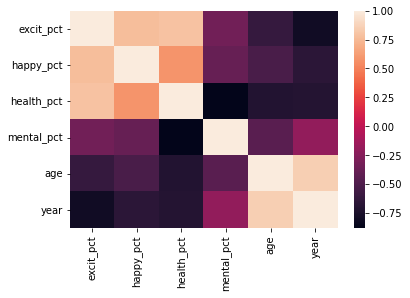

In [ ]:
sns.heatmap(by_year_ts[corr_vars].corr())

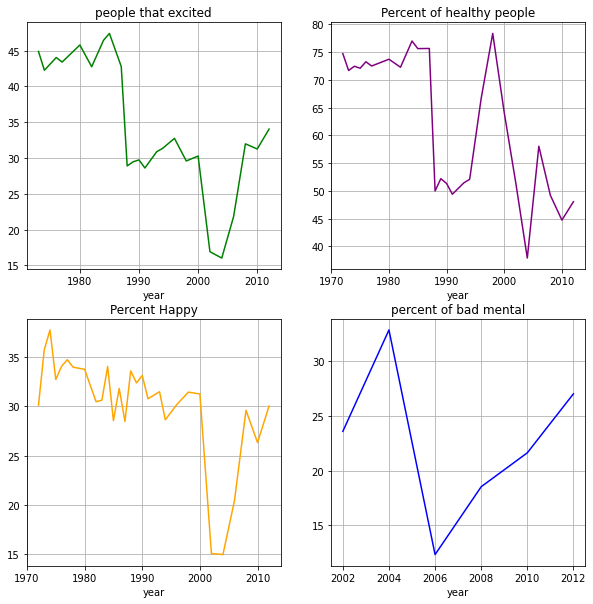

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

by_year_ts['excit_pct'].plot(title = 'people that excited', color = 'g', ax = axes[0,0], grid = True)
by_year_ts['health_pct'].plot(title = 'Percent of healthy people', color = 'purple', ax = axes[0,1], grid = True)
by_year_ts['happy_pct'].plot(title = 'Percent Happy', color = 'orange', ax = axes[1,0], grid = True)
by_year_ts['mental_pct'].plot(title = 'percent of bad mental', color = 'b', ax = axes[1,1], grid = True)

plt.show()

3. Run a simple time series regression, with one X and no trend. Interpret it.

In [ ]:
lm_mental = smf.ols('mental_pct ~ happy_pct', data = by_year_ts).fit()
lm_mental.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mental_pct   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.206
Date:                Mon, 12 Dec 2022   Prob (F-statistic):              0.309
Time:                        00:50:23   Log-Likelihood:                -28.262
No. Observations:                   9   AIC:                             60.52
Df Residuals:                       7   BIC:                             60.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8606      7.937      3.888      0.006      12.093      49.628
happy_pct     -0.3899      0.355     -1.098      0.309      -1.230       0.450
==============================================================================
Omnibus:                        0.203   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.226
Skew:                          -0.240   Prob(JB):                        0.893
Kurtosis:                       2.389   Cond. No.                         84.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For 1% change of the happiness that someone has, their chance of having a mental issue decrease by 0.38% on average, net of other factors, but it is not statistically significant at 5% or 10% significance level.

4. Run a time series regression with one X and trend. Interpret it. Perform autocorrelation diagnostics.
Explain what you found.

In [ ]:
lm_mental2 = smf.ols('mental_pct ~ happy_pct + year', data = by_year_ts).fit()
lm_mental2.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mental_pct   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     1.333
Date:                Mon, 12 Dec 2022   Prob (F-statistic):              0.332
Time:                        00:53:40   Log-Likelihood:                -27.322
No. Observations:                   9   AIC:                             60.64
Df Residuals:                       6   BIC:                             61.24
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4033.6174   3443.767     -1.171      0.286   -1.25e+04    4392.977
happy_pct     -1.3658      0.896     -1.524      0.178      -3.559       0.827
year           2.0363      1.725      1.180      0.283      -2.185       6.258
==============================================================================
Omnibus:                        2.856   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                1.100
Skew:                          -0.856   Prob(JB):                        0.577
Kurtosis:                       2.927   Cond. No.                     3.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from statsmodels.compat import lzip
name = ['BP', 'p-value', 'f-value', 'f p-value']

test2 = sm.stats.diagnostic.het_breuschpagan(lm_mental2.resid, lm_mental2.model.exog)
lzip(name, test2)

[('BP', 0.2199078505127996),
 ('p-value', 0.8958754115755101),
 ('f-value', 0.07513856805898451),
 ('f p-value', 0.9284738864105002)]

we have a f-value, getting from a f-statistic of the hypothesis that the error variance does not depend on x, that is 0.07. We also have a very huge p-value (0.89) which indeed show us the coefficient is insignificant, and usually, we need a  F statistic of at least 3.95 to reject the null hypothesis at an alpha level of 0.1.

In [ ]:
from statsmodels.tsa.stattools import acf

err2 = lm_mental2.resid
acf(err2)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.2148717 , -0.33756822, -0.30572017, -0.21026716,
       -0.05611911,  0.11092787,  0.06330156,  0.02057353])

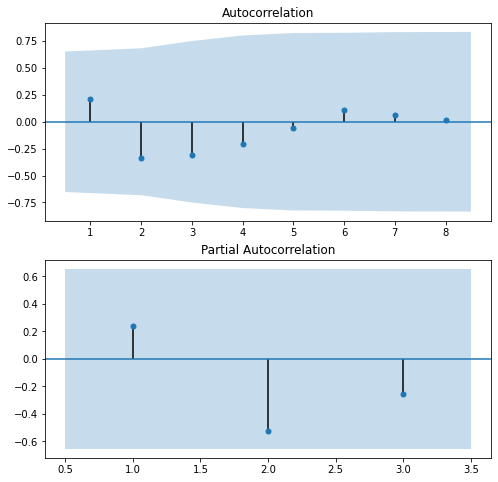

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(err2, lags = 8, zero = False, ax=ax[0]);
plot_pacf(err2, lags = 3.5, zero = False, ax=ax[1]);
plt.show()

From the graph shows, the t is closer to 0 than 1, which means t very likely  not remember anything from any earlier time period

In [ ]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

print('Durbin Watson statistic:', durbin_watson(err2))

lmtest2, pval2, fval2, f_pval2 = acorr_breusch_godfrey(lm_mental2, nlags = 1)
print('LM test =', lmtest2)
print('p-value =', pval2)

Durbin Watson statistic: 1.4727459982297981
LM test = 0.8869532353367198
p-value = 0.3463042898425541


In [ ]:
!pip install rpy2
import rpy2
%load_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%R
install.packages("caTools")    # For Linear regression 
library(caTools)

install.packages('car')
library(car)

NotImplementedError: ignored

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R -i by_year_ts

# refit the model using lm function from R
lm_trust2_r = lm(trust_pct ~ ba_pct + year, data = by_year_ts)

# pass the model to function
durbinWatsonTest(lm_trust2_r, max.lag = 5)

NotImplementedError: ignored

5. Consider running a time series regression with many Xs and trend. Interpret that. Check VIF.

In [ ]:
lm_trust3 = smf.ols('trust_pct ~ age + ba_pct + happy_pct + year', data = by_year_ts).fit()
lm_trust3.summary()

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('trust_pct ~ age + ba_pct + happy_pct + year',
                 data = by_year_ts, return_type = 'dataframe')

vif = pd.DataFrame()
vif['VIR Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.iloc[1:]

6. Run a first differenced time series regression. Interpret that.


In [ ]:
by_yearFD = pd.DataFrame()

by_yearFD = by_year_ts[['trust_pct', 'age', 'ba_pct', 'happy_pct']]
by_yearFD = by_yearFD.diff()

by_yearFD['year'] = by_year_ts['year']

In [ ]:
lm_trust4 = smf.ols('trust_pct ~ ba_pct + year', data = by_yearFD).fit()
lm_trust4.summary()

7. Check your variables for unit roots. Do some tests. Interpret them.

In [ ]:
from arch.unitroot import ADF, PhillipsPerron, DFGLS

ADF(by_year_ts['trust_pct'], lags = int(4*(len(by_year_ts)/100)**(2/9)), trend = 'c')

In [ ]:
DFGLS(by_year_ts['trust_pct'], lags = int(4*(len(by_year_ts)/100)**(2/9)), trend = 'c')

In [ ]:
PhillipsPerron(by_year_ts['trust_pct'], lags = 3)

8. Perform an Automatic ARIMA on the residuals from one of your earlier models. Tell me what it says.

In [ ]:
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings("ignore")

auto_arima(err2, trace = True, test='kpss', information_criterion='bic')

9. Run an ARIMA that follows from Step 8. Interpret that, too

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

by_year_ts['intercept'] = 1
arima_trust = SARIMAX(endog = by_year_ts['trust_pct'], order = (0, 0, 1), 
                      exog = by_year_ts[['ba_pct', 'year', 'intercept']]).fit(trend = 'nc')

In [ ]:
arima_trust.summary()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(arima_trust.resid, boxpierce = True, lags = round((len(by_year_ts)/2-2), 0))